In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
%matplotlib inline

In [46]:
data = pd.read_csv("Marketing_Analysis.csv", skiprows = 2)

## Análise exploratória univariada

In [47]:
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [48]:
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [49]:
data.shape

(45211, 19)

In [50]:
#Encontrar a moda nos dados do mês
month_mode = data.month.mode()[0]

data.month.fillna(month_mode, inplace = True)

In [51]:
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [52]:
data.dropna(axis=0, inplace=True)

In [53]:
data.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

In [54]:
data.drop('customerid', axis = 1, inplace = True)

#Extrair job & education da coluna jobedu
data['job'] = data['jobedu'].apply(lambda x: x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(',')[1])

data.drop('jobedu', axis = 1, inplace = True)

data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


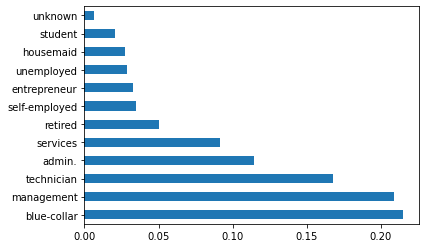

In [55]:
data.job.value_counts(normalize = True).plot.barh()
plt.show()

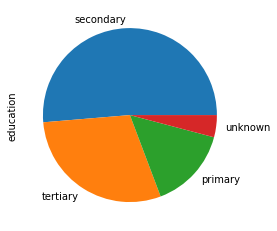

In [56]:
data.education.value_counts(normalize = True).plot.pie()
plt.show()

In [57]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## Análise exploratória bivariada

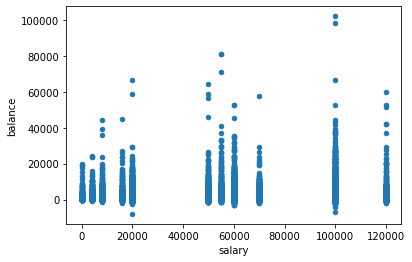

In [58]:
data.plot.scatter(x='salary', y='balance')
plt.show()

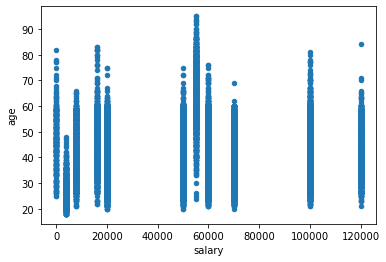

In [59]:
data.plot.scatter(x='salary', y='age')
plt.show()

KeyboardInterrupt: 

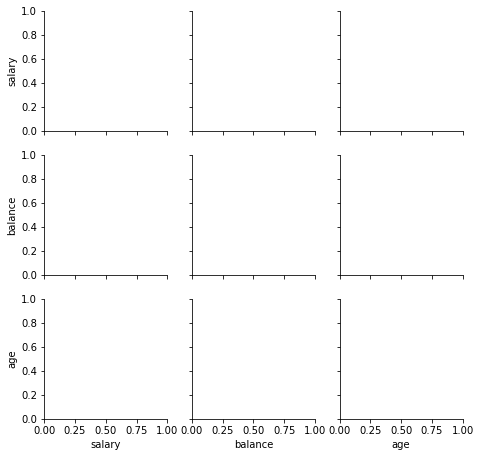

In [60]:
sns.pairplot(data = data, vars=['salary', 'balance', 'age'])
plt.show()

In [ ]:
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
data.groupby('response')['salary'].mean()

In [ ]:
data.groupby('response')['salary'].median()

In [ ]:
sns.boxplot(data.response, data.salary)

In [ ]:
#Cria variável response_rate. Informação: yes = 1, no = 0

data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

In [ ]:
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

In [ ]:
data.head()

In [ ]:
NUMERICAS = ['age','salary','balance','day','campaign','pdays','previous']

CATEGORICAS = ['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 
               'month', 'poutcome','job','education']

## Transformação variáveis numéricas

In [ ]:
data[NUMERICAS].head()

In [ ]:
scaler = StandardScaler()
teste_scaler = scaler.fit_transform(data[NUMERICAS])

new_df = pd.DataFrame(teste_scaler, columns = NUMERICAS)

In [ ]:
new_df

In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(0,1))
minmax_scaler.fit(data[NUMERICAS])
data_standardized = minmax_scaler.transform(data[NUMERICAS])

new_df_minmax = pd.DataFrame(data_standardized, columns = NUMERICAS)


In [ ]:
new_df_minmax

## Transformação variáveis categóricas

In [ ]:
data[CATEGORICAS]

In [ ]:
le = LabelEncoder()
df_categorical_encoding = data[CATEGORICAS].apply(le.fit_transform)

In [ ]:
df_categorical_encoding

## Concatenar variáveis em um único dataframe

In [ ]:
full_dataframe = pd.concat([new_df_minmax, df_categorical_encoding, data[['response_rate']]], axis=1)

In [ ]:
# isnulls 
full_dataframe.isnull().sum()

In [ ]:
full_dataframe.head()

In [ ]:
# como não prejudica treinamento vamos excluir as linhas nulls caso tenha
full_dataframe.dropna(axis=0, inplace=True)

In [ ]:
# isnulls 
full_dataframe.isnull().sum()

In [ ]:
full_dataframe.to_csv('df_processado.csv')